In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
IBM_Hr=pd.read_csv('HR_Attrition_Rate_Analytics.csv')
IBM_Hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
IBM_Hr.shape

(1470, 35)

In [4]:
IBM_Hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
IBM_Hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
IBM_Hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Checking Null values

In [7]:
IBM_Hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

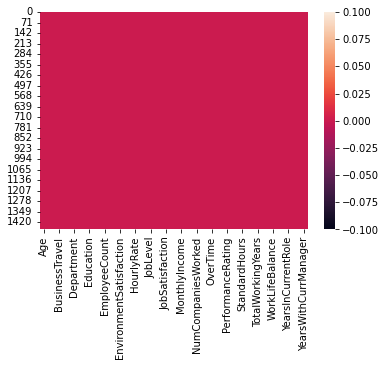

In [8]:
sns.heatmap(IBM_Hr.isnull())

# Visualization

No     1233
Yes     237
Name: Attrition, dtype: int64

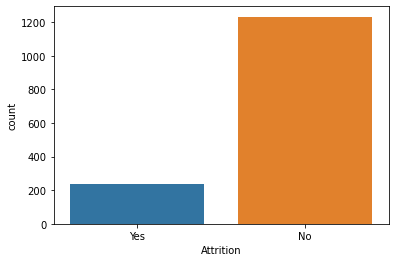

In [9]:
sns.countplot(IBM_Hr['Attrition'])
IBM_Hr['Attrition'].value_counts()

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

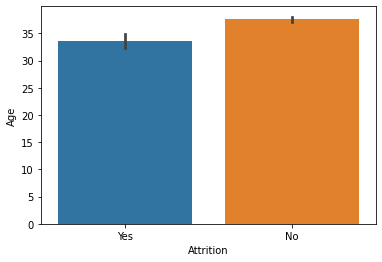

In [10]:
sns.barplot(x ='Attrition',y='Age',data=IBM_Hr)


In [11]:
IBM_Hr['Male']=IBM_Hr.Gender=='Male'

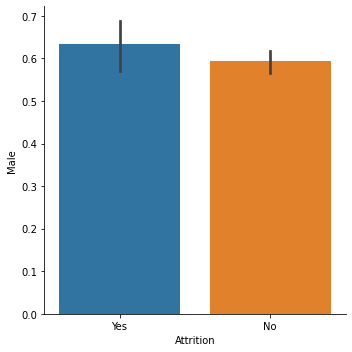

In [12]:
sns.factorplot(x='Attrition',y='Male',kind='bar',data=IBM_Hr)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

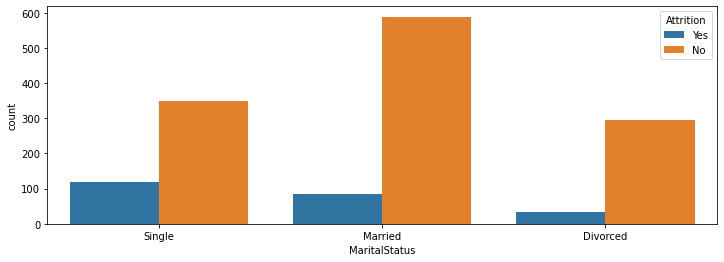

In [13]:
plt.subplots(figsize=(12,4))
sns.countplot(x='MaritalStatus',hue='Attrition',data=IBM_Hr)

<AxesSubplot:xlabel='Gender', ylabel='count'>

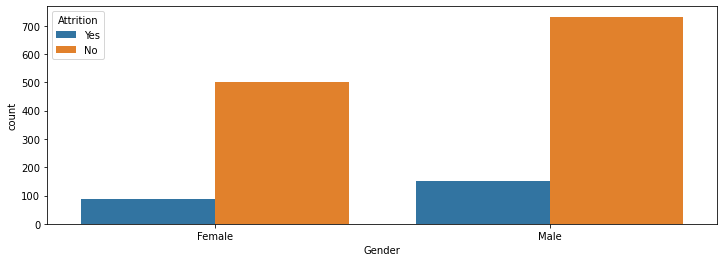

In [14]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Gender',hue='Attrition',data=IBM_Hr)

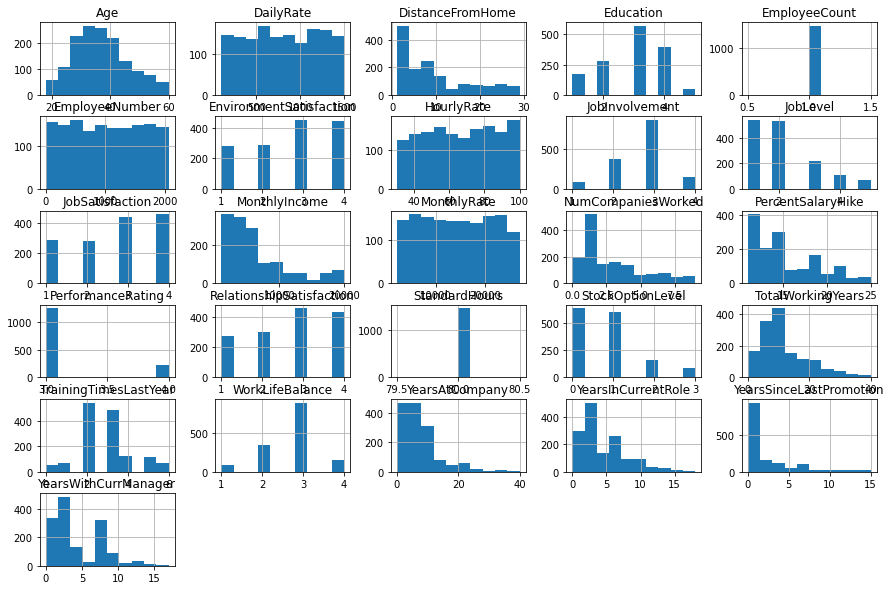

<Figure size 720x288 with 0 Axes>

In [15]:
IBM_Hr.hist(figsize=(15,10),bins=10)
plt.figure(figsize=(10,4))
plt.show()

<AxesSubplot:xlabel='Education', ylabel='Density'>

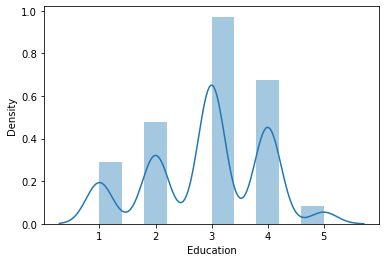

In [16]:
sns.distplot(IBM_Hr['Education'],bins=10)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

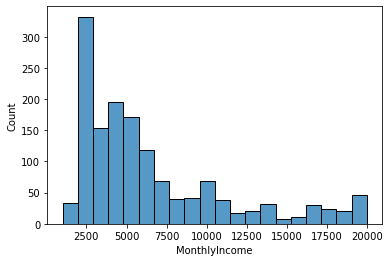

In [17]:
sns.histplot(IBM_Hr['MonthlyIncome'])

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

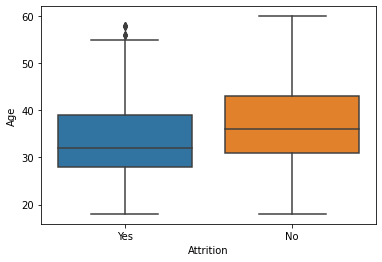

In [18]:
sns.boxplot(x='Attrition',y='Age',data=IBM_Hr)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

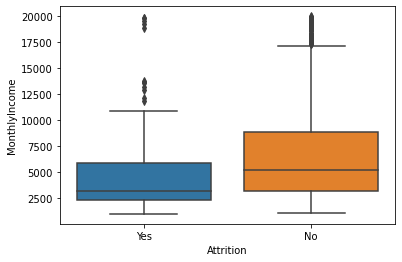

In [19]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=IBM_Hr)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

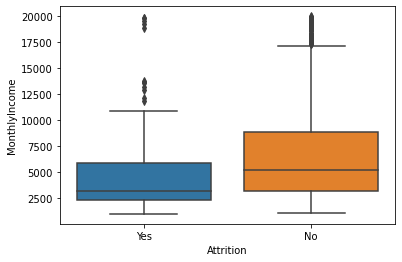

In [20]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=IBM_Hr)

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

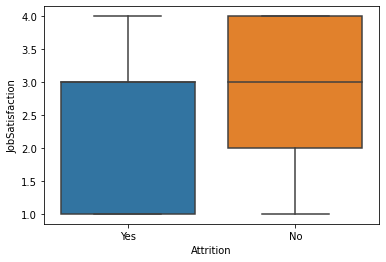

In [21]:
sns.boxplot(x='Attrition',y='JobSatisfaction',data=IBM_Hr)

In [22]:
IBM_Hr.drop('EmployeeCount',axis=1,inplace=True)
IBM_Hr.drop('StandardHours',axis=1,inplace=True)
IBM_Hr.drop('EmployeeNumber',axis=1,inplace=True)
IBM_Hr.drop('Over18',axis=1,inplace=True)
print(IBM_Hr.shape)

(1470, 32)


<AxesSubplot:>

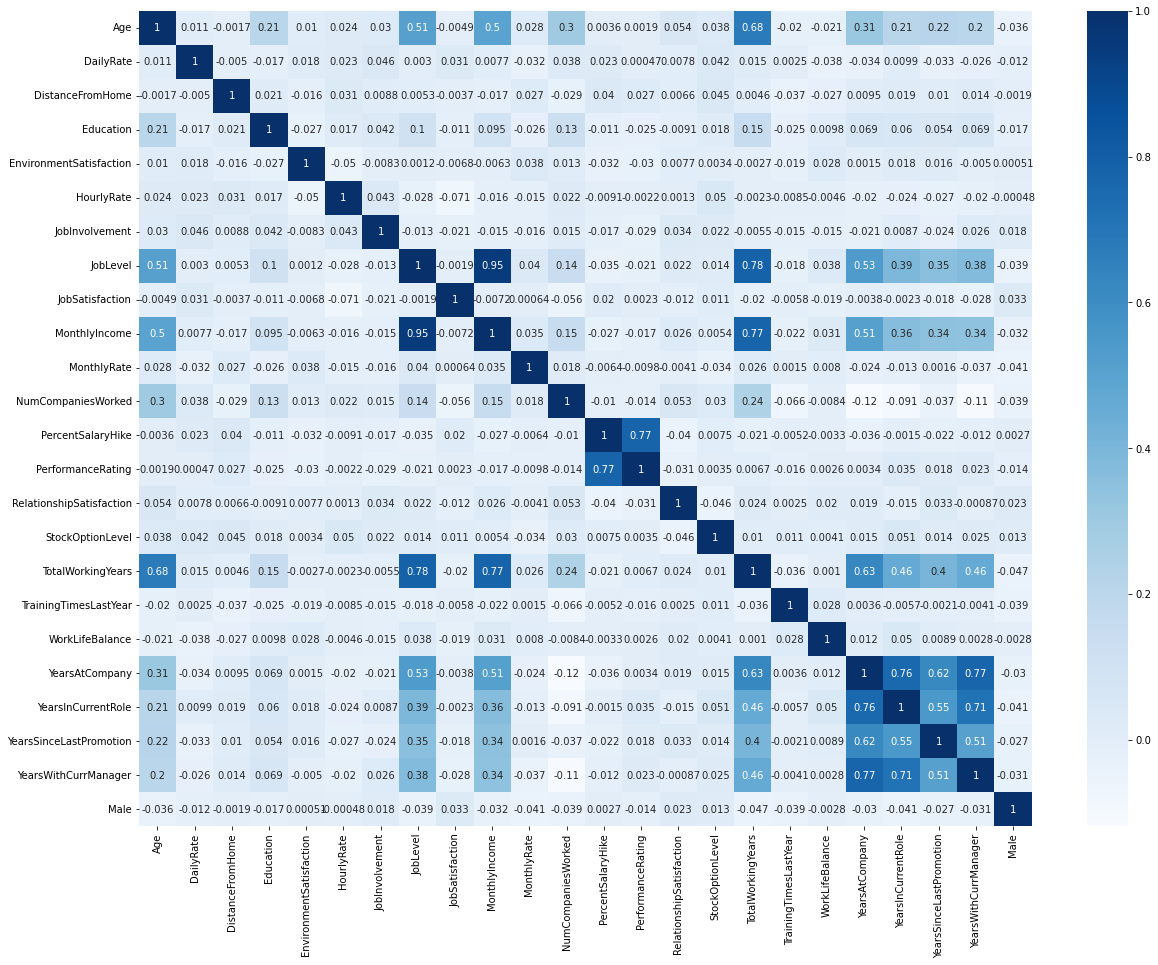

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(IBM_Hr.corr(),cmap='Blues',annot=True)

droped (Over18,EmployeeCount,StandardHours,EmployeeNumber)

In [24]:
IBM_Hr.shape

(1470, 32)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

<AxesSubplot:xlabel='Gender', ylabel='count'>

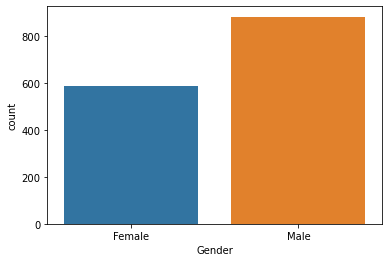

In [34]:
sns.countplot(IBM_Hr['Gender'])

There are more number of males as compare to females

<AxesSubplot:xlabel='Department', ylabel='count'>

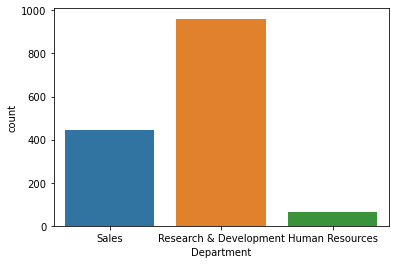

In [35]:
sns.countplot(IBM_Hr['Department'])

There are more employes in Research and Development Department as compare to Sales and Human Resources

<AxesSubplot:xlabel='Education', ylabel='count'>

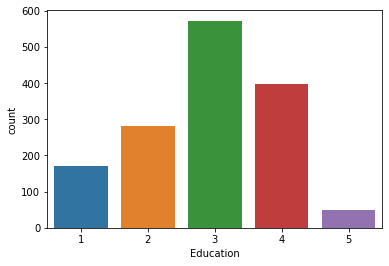

In [36]:
sns.countplot(IBM_Hr['Education'])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

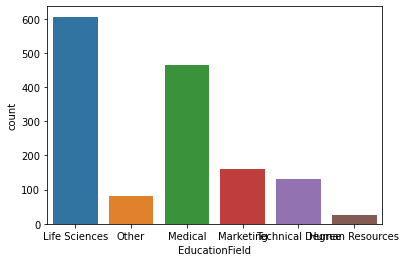

In [37]:
sns.countplot(IBM_Hr['EducationField'])

Field of education of more employees is life science

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

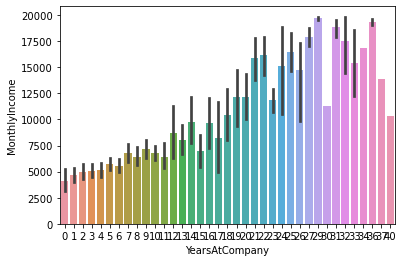

In [40]:
sns.barplot(x='YearsAtCompany',y='MonthlyIncome',data=IBM_Hr)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

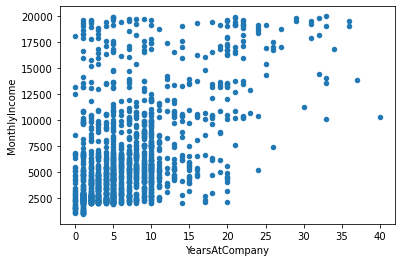

In [41]:
IBM_Hr.plot(x='YearsAtCompany',y='MonthlyIncome',kind='scatter')

salary increases as the years in the company increases


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

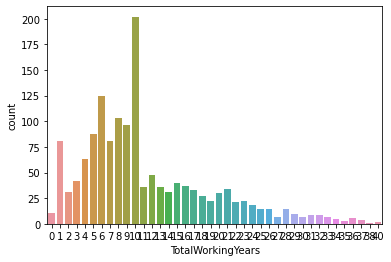

In [42]:
sns.countplot(IBM_Hr['TotalWorkingYears'])

There are maximum number of employees who have total working years in company is 10 years maximum working years is 40years

<AxesSubplot:xlabel='OverTime', ylabel='count'>

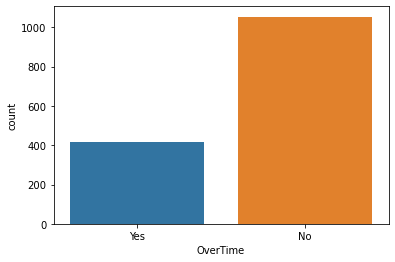

In [43]:
sns.countplot(IBM_Hr['OverTime'])

There are helf of employees who do overtime

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

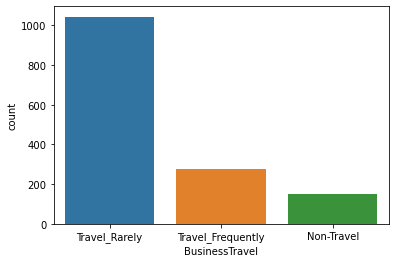

In [44]:
sns.countplot(IBM_Hr['BusinessTravel'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

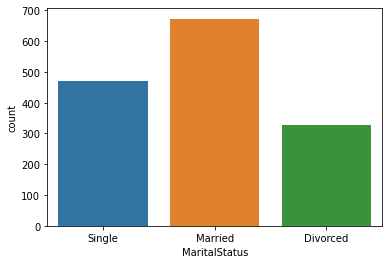

In [45]:
sns.countplot(IBM_Hr['MaritalStatus'])

There are more married employees as compare to single and divorced

In [46]:
IBM_Hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [47]:
print(IBM_Hr['Attrition'].unique())
print(IBM_Hr['OverTime'].unique())
print(IBM_Hr['Department'].unique())
print(IBM_Hr['BusinessTravel'].unique())
print(IBM_Hr['EducationField'].unique())
print(IBM_Hr['Gender'].unique())
print(IBM_Hr['JobRole'].unique())
print(IBM_Hr['MaritalStatus'].unique())

['Yes' 'No']
['Yes' 'No']
['Sales' 'Research & Development' 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']


In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [49]:
IBM_Hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [51]:
IBM_Hr.iloc[:,0]=labelencoder.fit_transform(IBM_Hr.iloc[:,0].values)
IBM_Hr.iloc[:,3]=labelencoder.fit_transform(IBM_Hr.iloc[:,3].values)
IBM_Hr.iloc[:,6]=labelencoder.fit_transform(IBM_Hr.iloc[:,6].values)
IBM_Hr.iloc[:,8]=labelencoder.fit_transform(IBM_Hr.iloc[:,8].values)
IBM_Hr.iloc[:,10]=labelencoder.fit_transform(IBM_Hr.iloc[:,10].values)
IBM_Hr.iloc[:,12]=labelencoder.fit_transform(IBM_Hr.iloc[:,12].values)
IBM_Hr.iloc[:,14]=labelencoder.fit_transform(IBM_Hr.iloc[:,14].values)
IBM_Hr.iloc[:,18]=labelencoder.fit_transform(IBM_Hr.iloc[:,18].values)

In [52]:
print(IBM_Hr['Attrition'].unique())
print(IBM_Hr['OverTime'].unique())
print(IBM_Hr['Department'].unique())
print(IBM_Hr['BusinessTravel'].unique())
print(IBM_Hr['EducationField'].unique())
print(IBM_Hr['Gender'].unique())
print(IBM_Hr['JobRole'].unique())
print(IBM_Hr['MaritalStatus'].unique())

['Yes' 'No']
['Yes' 'No']
['Sales' 'Research & Development' 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']


In [53]:
IBM_Hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
#splitting data into result and predictor variables
x=IBM_Hr.iloc[:,1:IBM_Hr.shape[1]].values
y=IBM_Hr.iloc[:,0].values

In [70]:
#train test splits
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)